# Test Normal model implementation

In [48]:
import numpy as np
import pandas as pd
from option_models import bsm
from option_models import basket
from option_models import basket_Levy
from matplotlib import pyplot as plt

In [49]:
### only run this when you changed the class definition
import imp
imp.reload(basket)

<module 'option_models.basket' from 'C:\\Users\\Jeremy\\Documents\\GitHub\\Project-team_asap\\option_models\\basket.py'>

weights: [1 0 0 0]
cor_m: 
 [[ 1.   0.2  0.2  0.2]
 [ 0.2  1.   0.2  0.2]
 [ 0.2  0.2  1.   0.2]
 [ 0.2  0.2  0.2  1. ]]
              bsm       levy         mc           gap
strike                                               
80      21.185930  21.185930  21.118906 -8.526513e-14
81      20.348379  20.348379  20.201306 -4.263256e-14
82      19.526455  19.526455  19.367647 -4.263256e-14
83      18.720866  18.720866  18.566796 -4.263256e-14
84      17.932279  17.932279  18.029322 -5.684342e-14
85      17.161318  17.161318  17.058102 -5.684342e-14
86      16.408558  16.408558  16.559739 -5.684342e-14
87      15.674521  15.674521  15.583578 -5.684342e-14
88      14.959672  14.959672  14.896397 -6.394885e-14
89      14.264418  14.264418  14.463384 -5.684342e-14
90      13.589108  13.589108  13.542393 -6.394885e-14
91      12.934027  12.934027  12.974689 -8.526513e-14
92      12.299398  12.299398  12.419141 -5.684342e-14
93      11.685384  11.685384  11.704332 -7.815970e-14
94      11.0920

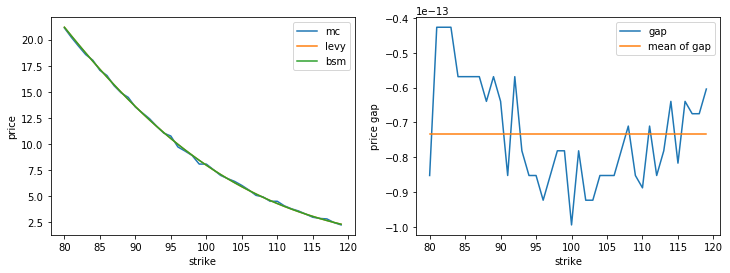

In [72]:
# A trivial test case 1: 
# one asset have 100% weight (the others zero)
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.array([1, 0, 0, 0])
divr = np.zeros(4)
intr = 0
cor_m = 0.8*np.identity(4) + 0.2*np.ones((4,4))
texp = 1
print('weights:',weights);print('cor_m: \n',cor_m)

basket1 = basket_Levy.Basket(vol, weights, cor_m, divr)

strikeRange = np.arange(80,120,1)
bsmList=[]
mcList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(bsm.bsm_price(strike, spot[0], vol[0], texp, intr, divr[0], cp_sign=1))
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket1.price_Levy(strike, spot, texp, intr))

priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList,'bsm':bsmList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)
print('------DEV------')
print (np.sqrt((priceFrm.gap**2).mean()))
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,mcList,label='mc')
ax1.plot(strikeRange,levyList,label='levy')
ax1.plot(strikeRange,bsmList,label='bsm')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price gap')
plt.show()

In [73]:
def plotGap(mcList,levyList,var,varRange):
    priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList},index=varRange)
    priceFrm['gap']=priceFrm['levy']-priceFrm['mc']
    priceFrm.index.name=var
    print (priceFrm)
    print('------DEV------')
    print (np.sqrt((priceFrm.gap**2).mean()))
    fig=plt.figure(figsize=(12,4))
    ax1=fig.add_subplot(1,2,1)
    ax2=fig.add_subplot(1,2,2)
    ax1.plot(varRange,mcList,label='mc')
    ax1.plot(varRange,levyList,label='levy')
    ax2.plot(varRange,priceFrm.gap,label='gap')
    ax2.plot(varRange,[np.mean(priceFrm.gap)]*len(varRange),label='mean of gap')
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax1.set_xlabel(var)
    ax2.set_xlabel(var)
    ax1.set_ylabel('price')
    ax2.set_ylabel('price gap')
    plt.show()
    return 

weights: [ 0.25  0.25  0.25  0.25]
cor_m: 
 [[ 1.      0.9999  0.9999  0.9999]
 [ 0.9999  1.      0.9999  0.9999]
 [ 0.9999  0.9999  1.      0.9999]
 [ 0.9999  0.9999  0.9999  1.    ]]
             levy         mc       gap
strike                                
80      21.185787  21.561429 -0.375642
81      20.348226  20.156595  0.191630
82      19.526291  19.432069  0.094222
83      18.720690  18.581124  0.139566
84      17.932092  18.049040 -0.116948
85      17.161121  17.190564 -0.029443
86      16.408350  16.503379 -0.095029
87      15.674303  15.715136 -0.040833
88      14.959444  15.283506 -0.324061
89      14.264181  14.289942 -0.025760
90      13.588862  13.371135  0.217727
91      12.933772  12.922980  0.010793
92      12.299136  12.191142  0.107994
93      11.685115  11.849746 -0.164631
94      11.091810  11.215750 -0.123940
95      10.519260  10.646140 -0.126880
96       9.967449  10.074241 -0.106793
97       9.436299   9.536782 -0.100483
98       8.925682   8.914210  0.011

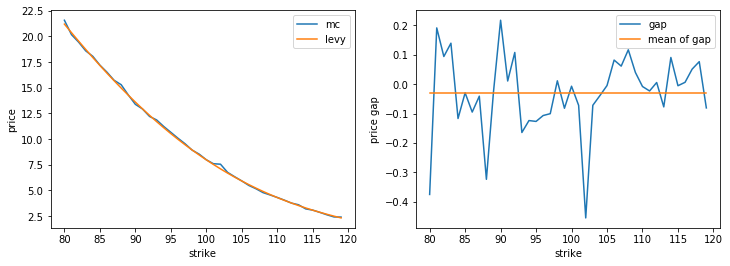

In [74]:
# A trivial test case 2

# all assets almost perfectly correlated:
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.0001*np.identity(4) + 0.9999*np.ones((4,4))
texp = 1

print('weights:',weights);print('cor_m: \n',cor_m)

basket2 = basket_Levy.Basket(vol, weights, cor_m, divr)

strikeRange = np.arange(80,120,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket2.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'strike',strikeRange)

In [75]:
# A test set for basket option
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5

weights: [ 0.25  0.25  0.25  0.25]
cor_m: 
 [[ 1.   0.5  0.5  0.5]
 [ 0.5  1.   0.5  0.5]
 [ 0.5  0.5  1.   0.5]
 [ 0.5  0.5  0.5  1. ]]
             levy         mc       gap
strike                                
80      36.398241  36.608409 -0.210167
81      35.921035  36.994132 -1.073098
82      35.450670  35.642143 -0.191473
83      34.987055  34.790642  0.196413
84      34.530098  35.277212 -0.747113
85      34.079709  34.749840 -0.670131
86      33.635796  32.752830  0.882966
87      33.198270  33.059349  0.138921
88      32.767041  32.171326  0.595715
89      32.342021  31.743902  0.598119
90      31.923122  31.184325  0.738797
91      31.510255  31.132427  0.377829
92      31.103336  31.388459 -0.285123
93      30.702278  31.376812 -0.674535
94      30.306996  29.972787  0.334209
95      29.917406  30.224101 -0.306694
96      29.533426  28.496623  1.036803
97      29.154973  29.390196 -0.235223
98      28.781965  28.869833 -0.087868
99      28.414323  28.070110  0.344213
100  

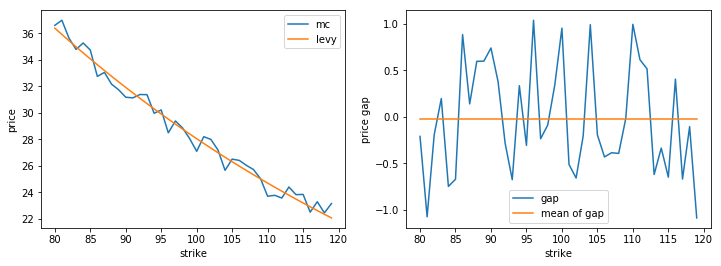

In [76]:
# MC price based on normal model
# make sure that the prices are similar
print('weights:',weights);print('cor_m: \n',cor_m)

basket3 = basket_Levy.Basket(vol, weights, cor_m, divr)

strikeRange = np.arange(80,120,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket3.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'strike',strikeRange)

In [77]:
#standard test example in Paper
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5

           levy         mc       gap
cor                                 
0.10  15.782731  14.134170  1.648561
0.30  19.034427  19.664153 -0.629726
0.50  22.072675  21.959099  0.113576
0.70  24.939585  24.724527  0.215058
0.80  26.317255  26.628765 -0.311509
0.95  28.320635  27.958551  0.362084
------DEV------
0.752949740337


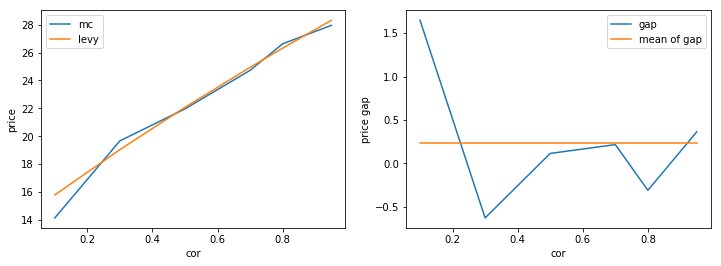

In [78]:
#(a) varing the correlations
corRange=[0.1,0.3,0.5,0.7,0.8,0.95]

mcList=[]
levyList=[]

for cor in corRange:
    cor_m = (1-cor)*np.identity(4) + cor*np.ones((4,4))
    basket4a = basket_Levy.Basket(vol, weights, cor_m, divr)
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4a.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'cor',corRange)

             levy         mc       gap
strike                                
50      57.178289  57.708236 -0.529947
60      51.216091  50.687011  0.529080
70      46.004195  44.938160  1.066034
80      41.442261  41.960359 -0.518097
90      37.439973  37.424863  0.015110
100     33.918719  34.852107 -0.933388
110     30.811178  31.810725 -0.999547
120     28.060128  27.842941  0.217186
130     25.617067  25.786355 -0.169288
140     23.440897  23.673467 -0.232570
150     21.496738  21.989885 -0.493147
------DEV------
0.618595942436


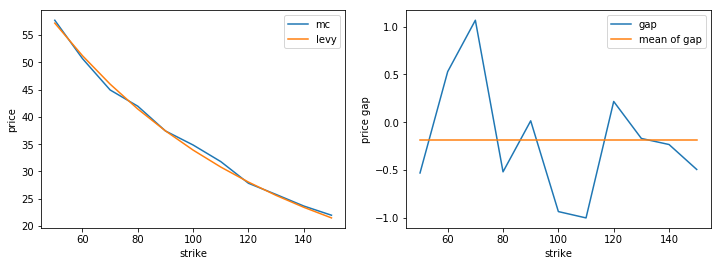

In [79]:
#(b) varing the strikes
strikeRange=range(50,160,10)

mcList=[]
levyList=[]
basket4b = basket_Levy.Basket(vol, weights, cor_m, divr)
for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4b.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'strike',strikeRange)

             levy         mc       gap
foward                                
50       3.586708   3.544040  0.042668
60       5.991468   5.878133  0.113335
70       9.025726   8.826725  0.199001
80      12.651599  12.055124  0.596475
90      16.824137  16.409235  0.414902
100     21.496738  21.359560  0.137178
110     26.624042  26.379470  0.244572
120     32.163392  32.572971 -0.409579
130     38.075470  35.133182  2.942288
140     44.324480  43.499890  0.824590
150     50.878078  49.874606  1.003473
------DEV------
1.00781237004


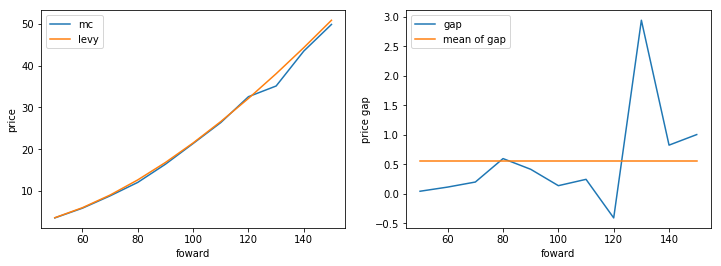

In [80]:
#(c) varing the fowards
fowardsRange=range(50,160,10)

mcList=[]
levyList=[]
basket4c = basket_Levy.Basket(vol, weights, cor_m, divr)
for foward in fowardsRange:
    spot=np.ones(4)*foward
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4c.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'foward',fowardsRange)

            levy          mc       gap
vol                                   
0.05    6.560542    6.443310  0.117231
0.10   13.101444   12.758726  0.342718
0.15   19.603245   20.170311 -0.567065
0.20   26.046830   26.401253 -0.354424
0.30   38.685633   38.055806  0.629827
0.40   50.878078   51.469917 -0.591839
0.50   62.499724   60.657520  1.842204
0.60   73.445176   78.415439 -4.970262
0.70   83.630756   83.442989  0.187767
0.80   92.996008   86.715919  6.280089
1.00  109.140850  108.466751  0.674099
------DEV------
2.51091687547


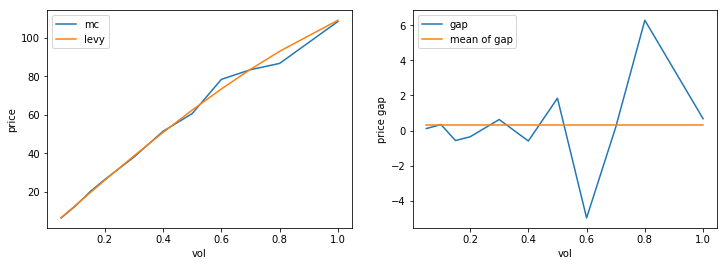

In [82]:
#(d1) varing the volatility, σi is set to the same value σ,which is
#varied between 5% and 100%.
volRange=[0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]

mcList=[]
levyList=[]

for vol in volRange:
    vol=np.ones(4) * vol
    basket4d1 = basket_Levy.Basket(vol, weights, cor_m, divr)
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4d1.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'vol',volRange)

            levy         mc        gap
vol                                   
0.05    6.560542   6.499787   0.060754
0.10   11.487266  11.243548   0.243718
0.15   16.449809  16.780455  -0.330647
0.20   21.472822  21.306302   0.166520
0.30   31.785869  29.908573   1.877295
0.40   42.528137  38.464574   4.063563
0.50   53.647150  50.350759   3.296391
0.60   64.913074  54.809426  10.103649
0.70   75.972769  62.307934  13.664835
0.80   86.464619  71.805800  14.658819
1.00  104.795749  84.088744  20.707005
------DEV------
9.35936852544


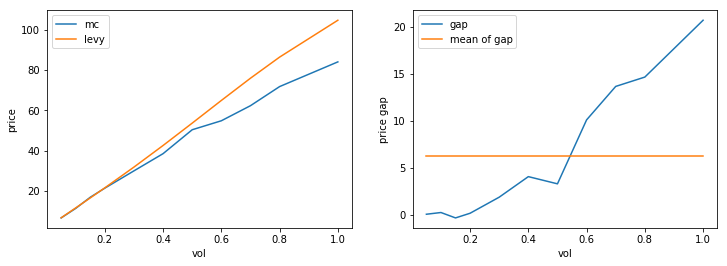

In [84]:
#(d2) varing the volatility, fix σ1 = 5% and vary the remaining volatilities
#symmetrically.
#varied between 5% and 100%.
volRange=[0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]

mcList=[]
levyList=[]

for vol in volRange:
    vol=np.array([0.05,vol,vol,vol])
    basket4d2 = basket_Levy.Basket(vol, weights, cor_m, divr)
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4d2.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'vol',volRange)

            levy          mc        gap
vol                                    
0.05   83.260647   35.642675  47.617972
0.10   83.469115   32.911036  50.558079
0.15   83.741577   37.306897  46.434680
0.20   84.088970   45.814018  38.274952
0.30   85.062448   50.493396  34.569052
0.40   86.512804   63.458661  23.054143
0.50   88.571469   82.931897   5.639572
0.60   91.342153   72.492975  18.849178
0.70   94.861552   89.125917   5.735635
0.80   99.083086   96.251083   2.832003
1.00  109.140850  112.306774  -3.165924
------DEV------
31.056096038


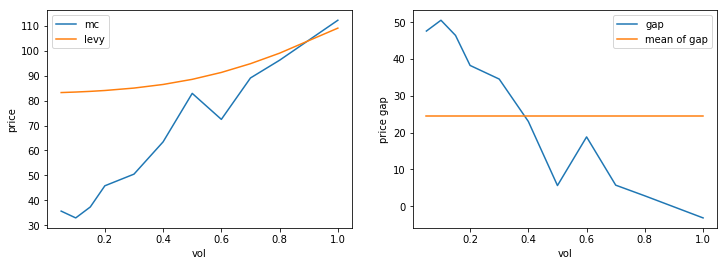

In [86]:
#(d3) varing the volatility, fix σ1 =100% and vary the remaining volatilities
#symmetrically.
#varied between 5% and 100%.
volRange=[0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]

mcList=[]
levyList=[]

for vol in volRange:
    vol=np.array([1,vol,vol,vol])
    basket4d1 = basket_Levy.Basket(vol, weights, cor_m, divr)
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket4d1.price_Levy(strike, spot, texp, intr))

plotGap(mcList,levyList,'vol',volRange)